In [0]:
#A program that classifies images of birds
##########################################
#                                        #
#               @Cole_Hanson             #
#                                        #
##########################################
'''
 ^ ^
(O,O)
(   )
-"-"---dwb---------------------------------
'''

import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2


In [0]:
#Mount Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Colab Notebooks'   data  'Getting started.pdf'


In [0]:
#Setup data to be read
DATA_DIR = "/content/drive/My Drive/data/train"
VALIDATION_DIR = "/content/drive/My Drive/data/validation"
CATEGORIES = ["american_goldfinch", "american_robin", "black-capped_chickadee", "cardinal", "cedar_waxwing","common_grackle", "downy_woodpecker", "house_finch", "house_wren", "mourning_dove", "read-headed_woodpecker", "ruby-throated_hummingbird", "white-breasted_nuthatch", "white-throated_sparrow"]

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_training_data():
    '''
    create training data set
    '''
    batch_size = 50
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data

    train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=DATA_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return train_data_gen
    

In [0]:
def create_validation_data():
    '''
    create validation data set
    '''
    batch_size = 50
    epochs = 7
    IMG_HEIGHT = 128
    IMG_WIDTH = 128
    validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

    validation_data = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                  directory=VALIDATION_DIR,
                                                  shuffle=True,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  class_mode='categorical')
    
    return validation_data
    

In [0]:
def plotImages(images_arr):
    '''
      plot images in a given array of images
    '''
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 736 images belonging to 14 classes.


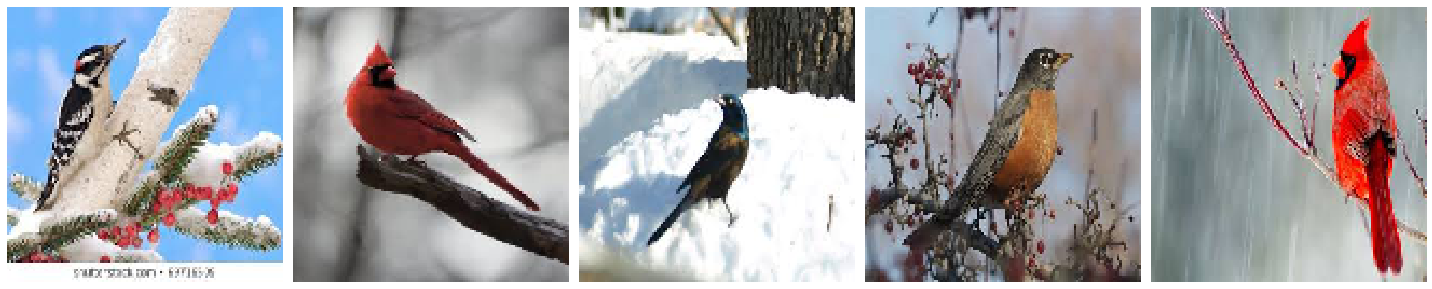

In [0]:
#test validation data
val = create_validation_data()
sample_validation_images, _ = next(val)
validation_n = len(val)
#visualize
plotImages(sample_validation_images[:5])


Found 1885 images belonging to 14 classes.


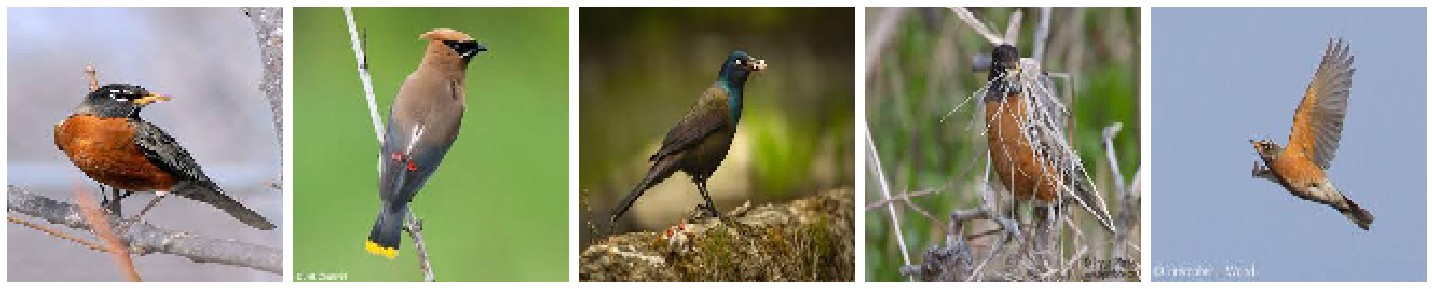

In [0]:
#test training
training_data = create_training_data()
n = len(training_data)
sample_training_images, _ = next(training_data)
validation_n = len(val)
plotImages(sample_training_images[:5])

In [0]:
#create CNN model
 model = Sequential([
 Conv2D(16, 3, padding='same', activation='relu', input_shape=(128, 128 ,3)),
 MaxPooling2D(),
 Conv2D(32, 3, padding='same', activation='relu'),
 MaxPooling2D(),
 Conv2D(64, 3, padding='same', activation='relu'),
 MaxPooling2D(),
 Flatten(),
 Dense(512, activation='relu'),
 Dense(1, activation='sigmoid')
])

SyntaxError: ignored